In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/cybersecurity_attacks_preprocessed_for_ML')

In [3]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,Log Data,Alert Data,Firewall
1,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Segment A,Log Data,Alert Data,Firewall
2,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,IoC Detected,97.82,Alert Triggered,Malware,Known Pattern B,Blocked,High,Segment A,Log Data,Alert Data,Firewall
3,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,IoC Detected,5.39,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Server
4,ICMP,765,Control,DNS,Dolores vitae neque velit maiores.\nReprehende...,IoC Detected,47.31,Alert Triggered,Intrusion,Known Pattern A,Blocked,Low,Segment C,Log Data,Alert Data,Server


In [4]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators = 200 , max_samples = 'auto' , contamination = float(0.5) , max_features = 1.0)

isf.fit(df[['Anomaly Scores']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.5, n_estimators=200)

In [5]:
df['anomaly_score_isolation_forest'] = isf.decision_function(df[['Anomaly Scores']])
df['anomaly'] = isf.predict(df[['Anomaly Scores']])
df['scores_samples'] = isf.score_samples(df[['Anomaly Scores']])


In [6]:
df.head(100)

,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,anomaly_score_isolation_forest,anomaly,scores_samples
0,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,Log Data,Alert Data,Firewall,-0.004971,-1,-0.507526
1,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Segment A,Log Data,Alert Data,Firewall,0.018958,1,-0.483596
2,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,IoC Detected,97.82,Alert Triggered,Malware,Known Pattern B,Blocked,High,Segment A,Log Data,Alert Data,Firewall,-0.086874,-1,-0.589429
3,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,IoC Detected,5.39,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Server,-0.057321,-1,-0.559876
4,ICMP,765,Control,DNS,Dolores vitae neque velit maiores.\nReprehende...,IoC Detected,47.31,Alert Triggered,Intrusion,Known Pattern A,Blocked,Low,Segment C,Log Data,Alert Data,Server,0.012763,1,-0.489791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TCP,641,Data,DNS,Dolorem nam atque cumque vel.\nOfficiis aut ra...,IoC Detected,12.38,Alert Triggered,Intrusion,Known Pattern B,Ignored,Low,Segment A,Log Data,Alert Data,Firewall,-0.029414,-1,-0.531968
96,TCP,697,Data,FTP,Quas assumenda provident tempora sint quis off...,IoC Detected,52.79,Alert Triggered,Intrusion,Known Pattern B,Logged,Medium,Segment C,Log Data,Alert Data,Server,0.021418,1,-0.481136
97,ICMP,823,Control,FTP,Magni mollitia necessitatibus quisquam quae re...,IoC Detected,2.66,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Segment C,Log Data,Alert Data,Firewall,-0.062851,-1,-0.565405
98,ICMP,343,Data,FTP,Fuga ducimus explicabo necessitatibus. Perspic...,IoC Detected,37.54,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Firewall,0.001617,1,-0.500937


Text(0.5, 1.0, 'Anomaly score in dataset and Anomalies generated by isolation forest')

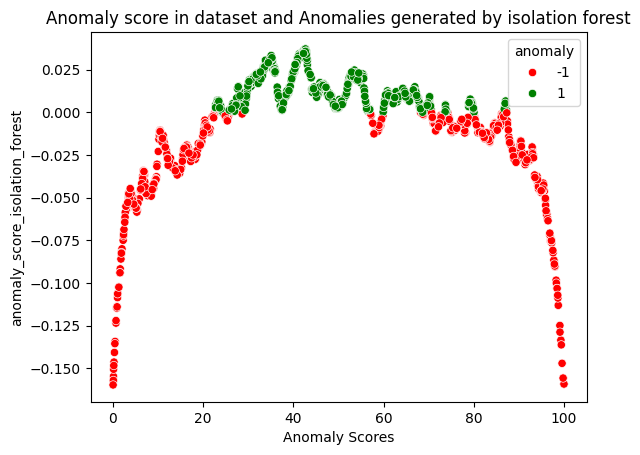

In [21]:
sns.scatterplot(data=df, x=df['Anomaly Scores'], y=df['anomaly_score_isolation_forest'], hue=df['anomaly'], size=None, style=None, palette = ['red' , 'green'], hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto')
plt.title('Anomaly score in dataset and Anomalies generated by isolation forest')
fig.savefig('Anomaly score in dataset and Anomalies generated by isolation forest.pdf' , dpi = fig.dpi)

Text(0.5, 1.0, 'Anomaly score in dataset and score samples generated by isolation forest')

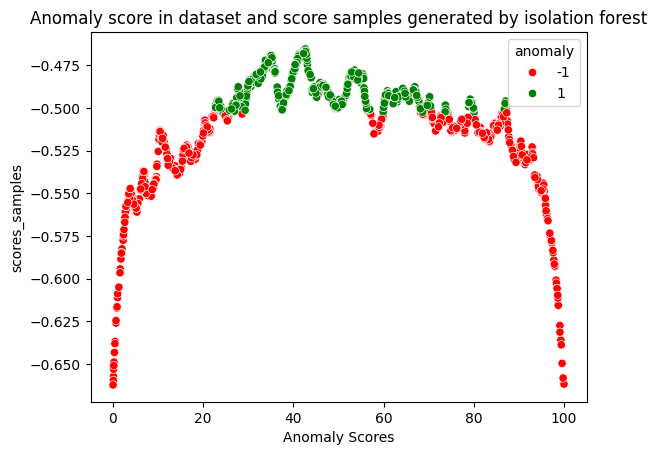

In [20]:
sns.scatterplot(data=df, x=df['Anomaly Scores'], y=df['scores_samples'], hue=df['anomaly'], size=None, style=None, palette = ['red' , 'green'], hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto')
plt.title('Anomaly score in dataset and score samples generated by isolation forest')
fig.savefig('Anomaly score in dataset and score samples generated by isolation forest.pdf' , dpi = fig.dpi)

Text(0.5, 1.0, 'packet length in dataset and Anomaly scores generated by isolation forest')

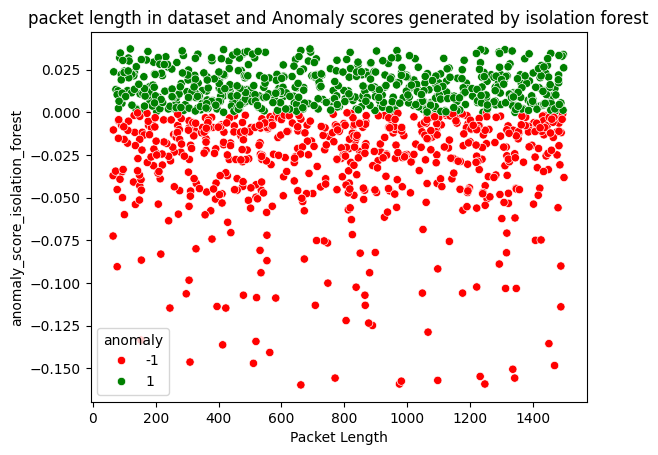

In [22]:
sns.scatterplot(data=df, x=df['Packet Length'], y=df['anomaly_score_isolation_forest'], hue=df['anomaly'], size=None, style=None, palette = ['red' , 'green'], hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto')
plt.title('Packet length in dataset and Anomaly scores generated by isolation forest')
fig.savefig('Packet length in dataset and Anomaly scores generated by isolation forest.pdf' , dpi = fig.dpi)

Text(0.5, 1.0, 'Different Protocol in dataset and Anomaly scores generated by isolation forest')

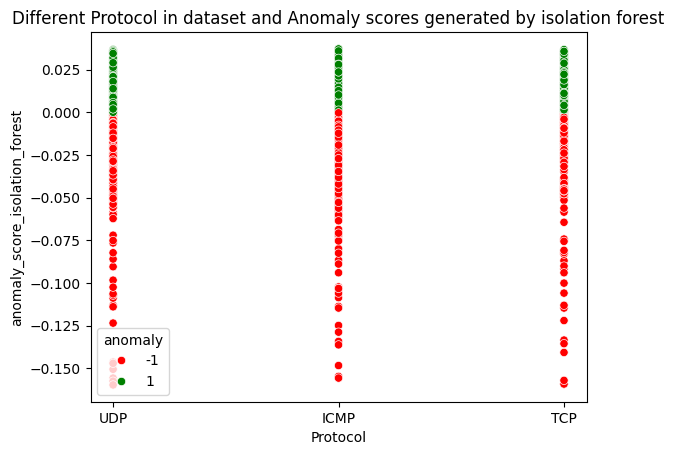

In [23]:
sns.scatterplot(data=df, x=df['Protocol'], y=df['anomaly_score_isolation_forest'], hue=df['anomaly'], size=None, style=None, palette = ['red' , 'green'], hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='full')
plt.title('Different Protocol in dataset and Anomaly scores generated by isolation forest')
fig.savefig('Different Protocol in dataset and Anomaly scores generated by isolation forest.pdf' , dpi = fig.dpi)

-1 : Anomaly
1 : Not Anomaly


Text(0.5, 1.0, 'Anomaly score in dataset and Anomaly scores generated by isolation forest')

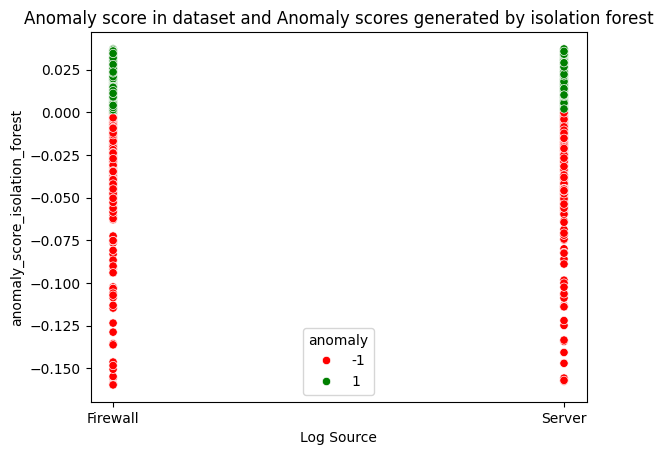

In [24]:
print('-1 : Anomaly')
print('1 : Not Anomaly')
sns.scatterplot(data=df, x=df['Log Source'], y=df['anomaly_score_isolation_forest'], hue=df['anomaly'], size=None, style=None, palette = ['red' , 'green'], hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='full')
plt.title('in dataset and Anomaly scores generated by isolation forest')
fig.savefig('Anomaly score in dataset and Anomaly scores generated by isolation forest.pdf' , dpi = fig.dpi)

In [12]:
df['anomaly'].value_counts()

anomaly
 1    619
-1    618
Name: count, dtype: int64

<Axes: xlabel='Log Source', ylabel='count'>

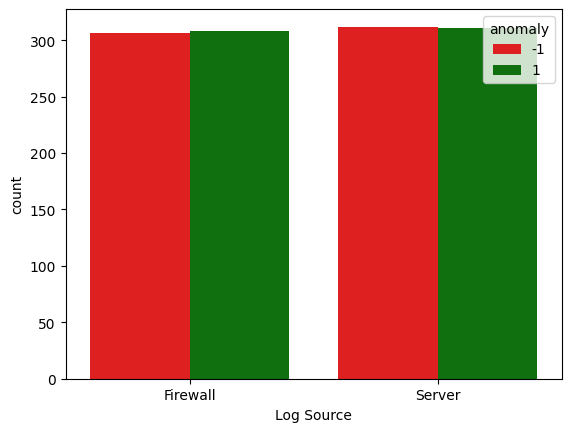

In [13]:
sns.countplot(data=df, x= df['Log Source'], hue = df['anomaly'], order=None, hue_order=None, orient=None, color=None, palette = ['red' , 'green'], saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None)

<Axes: xlabel='Protocol', ylabel='count'>

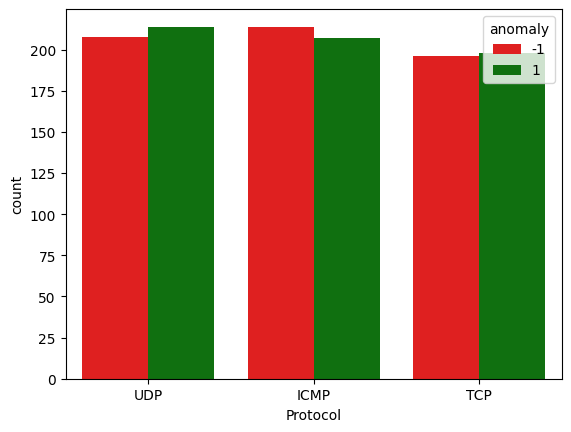

In [14]:
sns.countplot(data=df, x= df['Protocol'], hue = df['anomaly'], order=None, hue_order=None, orient=None, color=None, palette = ['red' , 'green'], saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None)

<Axes: xlabel='Attack Type', ylabel='count'>

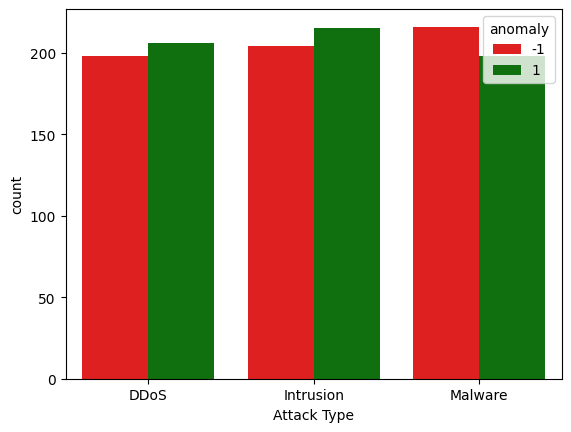

In [15]:
sns.countplot(data=df, x= df['Attack Type'], hue = df['anomaly'], order=None, hue_order=None, orient=None, color=None, palette = ['red' , 'green'], saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None)

<Axes: xlabel='Attack Signature', ylabel='count'>

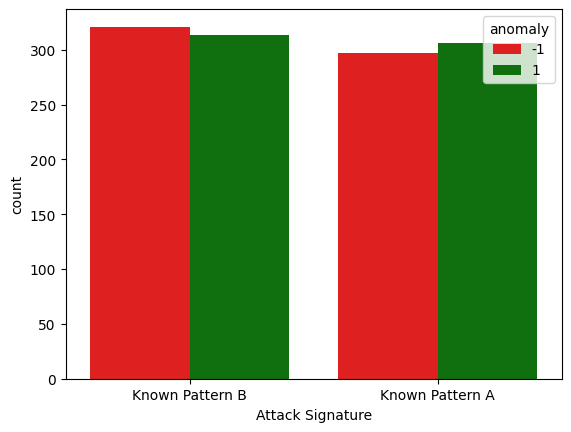

In [16]:
sns.countplot(data=df, x= df['Attack Signature'], hue = df['anomaly'], order=None, hue_order=None, orient=None, color=None, palette = ['red' , 'green'], saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None)